In [1]:
# Import Libraries and Modules used for class
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import lxml
import seaborn
import statsmodels
import patsy
import requests
from datetime import datetime, timedelta

# Milestone 3 (Weeks 7 & 8)

Cleaning/Formatting Website Data

Perform at least 5 data transformation and/or cleansing steps to your website data. For example:

Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matching

In [2]:
#Age Group (AG) race HTML
## https://thechampionship.de/race-information/results/
fd1 = open('CHALLENGE_FAMILY_-_THE_CHAMPIONSHIP_2019-06-02.html','r',encoding ="utf8")
soup1 = BeautifulSoup(fd1)
fd1.close()

In [3]:
#Professional race HTML
## https://thechampionship.de/race-information/results/
fd2 = open('CHALLENGE_FAMILY_-_THE_CHAMPIONSHIP_2019-06-02_PRO.html','r',encoding ="utf8")
soup2 = BeautifulSoup(fd2)
fd2.close()

In [4]:
# data table for AG race
data_table1 = soup1.find("table", {"class": "MainTable tablesorter tablesorter-default sortable"})
print(type(data_table1))

<class 'bs4.element.Tag'>


In [5]:
# data table for Pro race
data_table2 = soup2.find("table", {"class": "MainTable tablesorter tablesorter-default sortable"})
print(type(data_table2))

<class 'bs4.element.Tag'>


In [6]:
# find headers for AG race
header_data1 = data_table1.find_all('th', {"class": "sorter-text"})
header_data1

[<th class="sorter-text" style="text-align: left;">Rank</th>,
 <th class="sorter-text" style="text-align: left;">BIB</th>,
 <th class="sorter-text" style="text-align: left;">Name</th>,
 <th class="sorter-text" style="text-align: left;">Nation</th>,
 <th class="sorter-text" style="text-align: left;">Cat.|Rank</th>,
 <th class="sorter-text" style="text-align: left;">Swim</th>,
 <th class="sorter-text" style="text-align: left;">T1</th>,
 <th class="sorter-text" style="text-align: left;">Bike</th>,
 <th class="sorter-text" style="text-align: left;">T2</th>,
 <th class="sorter-text" style="text-align: left;">Run</th>,
 <th class="sorter-text" style="text-align: left;">Total</th>,
 <th class="sorter-text" style="text-align: left;">Gap</th>,
 <th class="sorter-text" style="text-align: left;">Team</th>]

In [7]:
# find headers for Pro race
header_data2 = data_table2.find_all('th', {"class": "sorter-text"})
header_data2

[<th class="sorter-text" style="text-align: left;">Rank</th>,
 <th class="sorter-text" style="text-align: left;">BIB</th>,
 <th class="sorter-text" style="text-align: left;">Name</th>,
 <th class="sorter-text" style="text-align: left;">Nation</th>,
 <th class="sorter-text" style="text-align: left;">Cat.|Rank</th>,
 <th class="sorter-text" style="text-align: left;">Swim</th>,
 <th class="sorter-text" style="text-align: left;">T1</th>,
 <th class="sorter-text" style="text-align: left;">Bike</th>,
 <th class="sorter-text" style="text-align: left;">T2</th>,
 <th class="sorter-text" style="text-align: left;">Run</th>,
 <th class="sorter-text" style="text-align: left;">Total</th>,
 <th class="sorter-text" style="text-align: left;">Gap</th>,
 <th class="sorter-text" style="text-align: left;">Team</th>]

In [8]:
# extract headers for AG race
headers1 = []
for th in header_data1:
    headers1.append(th.text.strip())
headers1

['Rank',
 'BIB',
 'Name',
 'Nation',
 'Cat.|Rank',
 'Swim',
 'T1',
 'Bike',
 'T2',
 'Run',
 'Total',
 'Gap',
 'Team']

In [9]:
# extract headers for Pro race
headers2 = []
for th in header_data2:
    headers2.append(th.text.strip())
headers2

['Rank',
 'BIB',
 'Name',
 'Nation',
 'Cat.|Rank',
 'Swim',
 'T1',
 'Bike',
 'T2',
 'Run',
 'Total',
 'Gap',
 'Team']

In [10]:
#test gets all the rows of the table
record_data1 = data_table1.find_all('td',{"style":("text-align: left;", 
                                                  "font-weight: bold; text-align: left;", 
                                                  "font-weight: bold; text-align: left;")})

In [11]:
#test gets all the rows of the table
record_data2 = data_table2.find_all('td',{"style":("text-align: left;", 
                                                  "font-weight: bold; text-align: left;", 
                                                  "font-weight: bold; text-align: left;")})

In [12]:
# data for AG race
record_data1

[<td style="text-align: left;">1.</td>,
 <td style="text-align: left;">2116</td>,
 <td style="font-weight: bold; text-align: left;">HALLIWELL, Brett                </td>,
 <td style="text-align: left;">GBR</td>,
 <td style="text-align: left;">M 25 | 1.</td>,
 <td style="text-align: left;">28:27 | 17.</td>,
 <td style="text-align: left;">03:18</td>,
 <td style="text-align: left;">2:06:50 | 5.</td>,
 <td style="text-align: left;">03:10</td>,
 <td style="text-align: left;">1:20:24 | 6.</td>,
 <td style="font-weight: bold; text-align: left;">4:02:07</td>,
 <td style="text-align: left;">-</td>,
 <td style="text-align: left;">Yonda Racing</td>,
 <td style="text-align: left;">2.</td>,
 <td style="text-align: left;">2242</td>,
 <td style="font-weight: bold; text-align: left;">HODGSON, Gareth                </td>,
 <td style="text-align: left;">GBR</td>,
 <td style="text-align: left;">M 30 | 1.</td>,
 <td style="text-align: left;">29:38 | 37.</td>,
 <td style="text-align: left;">04:07</td>,
 <t

In [13]:
# data for Pro race
record_data2

[<td style="text-align: left;">1.</td>,
 <td style="text-align: left;">1</td>,
 <td style="font-weight: bold; text-align: left;">KIENLE, Sebastian                </td>,
 <td style="text-align: left;">GER</td>,
 <td style="text-align: left;">PRO M | 1.</td>,
 <td style="text-align: left;">25:43 | 19.</td>,
 <td style="text-align: left;">02:51</td>,
 <td style="text-align: left;">1:56:27 | 3.</td>,
 <td style="text-align: left;">02:19</td>,
 <td style="text-align: left;">1:11:31 | 1.</td>,
 <td style="font-weight: bold; text-align: left;">3:38:50</td>,
 <td style="text-align: left;">-</td>,
 <td style="text-align: left;">HEP Sportsteam</td>,
 <td style="text-align: left;">2.</td>,
 <td style="text-align: left;">10</td>,
 <td style="font-weight: bold; text-align: left;">HEEMERYCK, Pieter                </td>,
 <td style="text-align: left;">BEL</td>,
 <td style="text-align: left;">PRO M | 2.</td>,
 <td style="text-align: left;">23:50 | 12.</td>,
 <td style="text-align: left;">02:38</td>,
 

In [14]:
type(record_data1)

bs4.element.ResultSet

In [15]:
# strip AG data
data1 = []
for td in record_data1:
    data1.append(td.text.strip())
data1

['1.',
 '2116',
 'HALLIWELL, Brett',
 'GBR',
 'M 25 | 1.',
 '28:27 | 17.',
 '03:18',
 '2:06:50 | 5.',
 '03:10',
 '1:20:24 | 6.',
 '4:02:07',
 '-',
 'Yonda Racing',
 '2.',
 '2242',
 'HODGSON, Gareth',
 'GBR',
 'M 30 | 1.',
 '29:38 | 37.',
 '04:07',
 '2:07:11 | 8.',
 '03:23',
 '1:18:39 | 3.',
 '4:02:56',
 '+0:49',
 'Team Xhale',
 '3.',
 '2449',
 'GODART, Olivier',
 'LUX',
 'M 40 | 1.',
 '31:23 | 69.',
 '04:02',
 '2:08:50 | 12.',
 '03:13',
 '1:17:36 | 2.',
 '4:05:01',
 '+2:54',
 '',
 '4.',
 '2157',
 'KARAŚ, Sebastian',
 'POL',
 'M 25 | 2.',
 '23:56 | 1.',
 '03:28',
 '2:06:30 | 3.',
 '02:36',
 '1:29:07 | 55.',
 '4:05:35',
 '+3:28',
 'Team Karaś',
 '5.',
 '2107',
 'BERNAL GARCIA, Sergio',
 'ESP',
 'M 25 | 3.',
 '26:32 | 4.',
 '03:55',
 '2:08:34 | 11.',
 '02:20',
 '1:25:02 | 23.',
 '4:06:20',
 '+4:13',
 '',
 '6.',
 '2100',
 'SCHAFFERT, Fabian',
 'GER',
 'M 25 | 4.',
 '29:33 | 34.',
 '03:27',
 '2:05:45 | 2.',
 '02:36',
 '1:27:29 | 39.',
 '4:08:49',
 '+6:42',
 'Tri Team FFB',
 '7.',
 '2324',
 

In [16]:
#strip Pro data
data2 = []
for td in record_data2:
    data2.append(td.text.strip())
data2

['1.',
 '1',
 'KIENLE, Sebastian',
 'GER',
 'PRO M | 1.',
 '25:43 | 19.',
 '02:51',
 '1:56:27 | 3.',
 '02:19',
 '1:11:31 | 1.',
 '3:38:50',
 '-',
 'HEP Sportsteam',
 '2.',
 '10',
 'HEEMERYCK, Pieter',
 'BEL',
 'PRO M | 2.',
 '23:50 | 12.',
 '02:38',
 '1:56:02 | 2.',
 '02:14',
 '1:14:39 | 7.',
 '3:39:22',
 '+0:32',
 'DOMO SCOTT PRO TEAM',
 '3.',
 '8',
 'VON BERG, Rodolphe',
 'USA',
 'PRO M | 3.',
 '23:41 | 7.',
 '02:53',
 '1:57:11 | 6.',
 '02:19',
 '1:13:46 | 3.',
 '3:39:47',
 '+0:57',
 '',
 '4.',
 '9',
 'DREITZ, Andreas',
 'GER',
 'PRO M | 4.',
 '26:15 | 23.',
 '03:26',
 '1:54:06 | 1.',
 '02:35',
 '1:13:51 | 4.',
 '3:40:11',
 '+1:21',
 'SV Bayreuth / Team Erdinger Alkoholfrei',
 '5.',
 '2',
 'ANGERT, Florian',
 'GER',
 'PRO M | 5.',
 '23:38 | 6.',
 '02:55',
 '1:56:33 | 4.',
 '02:08',
 '1:16:15 | 10.',
 '3:41:26',
 '+2:36',
 'Soprema Team TSV Mannheim',
 '6.',
 '11',
 'CLAVEL, Maurice',
 'GER',
 'PRO M | 6.',
 '23:42 | 8.',
 '02:45',
 '1:57:06 | 5.',
 '02:06',
 '1:16:29 | 11.',
 '3:42:0

In [17]:
# spilt the AG data
def split(l, n):  
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

# list should have 
n = 13 
x1 = list(split(data1, n)) 

In [18]:
# split the Pro data
def split(l, n):  
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

# list should have 
n = 13 
x2 = list(split(data2, n)) 

In [19]:
# assemble AG data into DF
cf191 = pd.DataFrame(data=x1,columns=headers1)

In [20]:
# assemble Pro data into DF
cf192 = pd.DataFrame(data=x2,columns=headers2)

In [21]:
# cleanse the category/rank field on the pro race before combining w/ Age Group results
cf192['Cat1'] = cf192['Cat.|Rank'].apply(lambda x: x.split(' ')[1])
cf192['Cat2'] = cf192['Cat.|Rank'].apply(lambda x: x.split(' ')[0])
cf192['Cat.|Rank'] = cf192['Cat1']
cf192.drop(labels=['Cat1'],axis=1,inplace=True)
cf192.drop(labels=['Cat2'],axis=1,inplace=True)

In [22]:
# put the two DFs together
cf19 = pd.concat([cf191,cf192]).sort_values(by=['Rank'])

In [23]:
# check new DF
cf19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 611
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       672 non-null    object
 1   BIB        672 non-null    object
 2   Name       672 non-null    object
 3   Nation     672 non-null    object
 4   Cat.|Rank  672 non-null    object
 5   Swim       672 non-null    object
 6   T1         672 non-null    object
 7   Bike       672 non-null    object
 8   T2         672 non-null    object
 9   Run        672 non-null    object
 10  Total      672 non-null    object
 11  Gap        672 non-null    object
 12  Team       672 non-null    object
dtypes: object(13)
memory usage: 73.5+ KB


In [24]:
# review data
cf19.head()

,Rank,BIB,Name,Nation,Cat.|Rank,Swim,T1,Bike,T2,Run,Total,Gap,Team
0,1.,2116,"HALLIWELL, Brett",GBR,M 25 | 1.,28:27 | 17.,03:18,2:06:50 | 5.,03:10,1:20:24 | 6.,4:02:07,-,Yonda Racing
0,1.,1,"KIENLE, Sebastian",GER,M,25:43 | 19.,02:51,1:56:27 | 3.,02:19,1:11:31 | 1.,3:38:50,-,HEP Sportsteam
27,1.,61,"CHARLES-BARCLAY, Lucy",GBR,F,24:19 | 1.,03:14,2:11:06 | 3.,02:27,1:19:20 | 2.,4:00:24,-,Team Charles Barclay
404,1.,1126,"GROSVENOR, Tara",GBR,F 30 | 1.,30:43 | 8.,03:35,2:25:05 | 7.,03:08,1:26:52 | 1.,4:29:22,-,
9,10.,46,"BOWDEN, Adam",GBR,M,23:35 | 5.,02:57,2:00:03 | 9.,02:27,1:15:07 | 8.,3:44:07,+5:17,One2one Therapy


In [25]:
# Data transformation 1
# create two new columns for first & last names, strip blanks
# extract gender from category
cf19['LName'] = cf19['Name'].apply(lambda x: x.split(',')[0])
cf19['FName'] = cf19['Name'].apply(lambda x: x.split(',')[1])
cf19['FName'] = cf19['FName'].str.strip()
cf19['LName'] = cf19['LName'].str.strip()
cf19['Gender'] = cf19['Cat.|Rank'].apply(lambda x: x[:1])

In [26]:
# Data transformation 2
# drop columns
cf19.drop(labels=['Gap'],axis=1,inplace=True)
cf19.drop(labels=['BIB'],axis=1,inplace=True)
cf19.drop(labels=['Team'],axis=1,inplace=True)
cf19.drop(labels=['Cat.|Rank'],axis=1,inplace=True)

In [27]:
# Data transformation 3
# remove alphas from column data
cf19['Swim'] = cf19['Swim'].apply(lambda x: x.split('|')[0])
cf19['Bike'] = cf19['Bike'].apply(lambda x: x.split('|')[0])
cf19['Run'] = cf19['Run'].apply(lambda x: x.split('|')[0])
cf19['Rank'] = cf19['Rank'].apply(lambda x: x.split('.')[0])

The below section cleans up the swim times for all participants

In [28]:
type(cf19['Swim'])

pandas.core.series.Series

In [29]:
# create variable to find those who swam more than 1 hour
search = '1:'

In [30]:
# create a column to flag those who swam more than an hour
cf19['swimf']=cf19['Swim'].str.startswith(search) 

In [31]:
# segregate those with swim times using 1 hour as demarcation
dfp = cf19[cf19.swimf == True]
dfn = cf19[cf19.swimf == False]

In [32]:
# add a zero to those who swam an hour so their time starts with 01:
dfp.Swim = '0'+dfp.Swim

C:\Users\longr\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
# add double zero to those who swam less than an hour
dfn.Swim = '00:'+dfn.Swim

In [34]:
#combine them in series
frames = [dfn,dfp]

In [35]:
#concat the series
cf19 = pd.concat(frames)

In [36]:
#other times need some tweaks, but not as difficult as swim
cf19['Bike'] = '0' + cf19['Bike']
cf19['Run'] = '0' + cf19['Run']
cf19['Total'] = '0' + cf19['Total']
cf19['T1'] = '00:' + cf19['T1']
cf19['T2'] = '00:' + cf19['T2']

In [37]:
#confirm changes
cf19

,Rank,Name,Nation,Swim,T1,Bike,T2,Run,Total,LName,FName,Gender,swimf
0,1,"HALLIWELL, Brett",GBR,00:28:27,00:03:18,02:06:50,00:03:10,01:20:24,04:02:07,HALLIWELL,Brett,M,False
0,1,"KIENLE, Sebastian",GER,00:25:43,00:02:51,01:56:27,00:02:19,01:11:31,03:38:50,KIENLE,Sebastian,M,False
27,1,"CHARLES-BARCLAY, Lucy",GBR,00:24:19,00:03:14,02:11:06,00:02:27,01:19:20,04:00:24,CHARLES-BARCLAY,Lucy,F,False
404,1,"GROSVENOR, Tara",GBR,00:30:43,00:03:35,02:25:05,00:03:08,01:26:52,04:29:22,GROSVENOR,Tara,F,False
9,10,"BOWDEN, Adam",GBR,00:23:35,00:02:57,02:00:03,00:02:27,01:15:07,03:44:07,BOWDEN,Adam,M,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,"MENG, Ya Hui",TPE,01:08:07,00:09:38,03:03:19,00:07:34,02:44:53,07:13:29,MENG,Ya Hui,M,True
381,382,"CHRISTEN, Bruno",SUI,01:04:40,00:13:42,03:10:53,00:06:24,02:42:39,07:18:16,CHRISTEN,Bruno,M,True
383,384,"NIEUWENHUIZEN, Geert",NED,01:19:49,00:11:22,03:10:26,00:08:25,02:32:09,07:22:08,NIEUWENHUIZEN,Geert,M,True
385,386,"HSU, Chun-Kai",TPE,01:13:59,00:10:04,03:16:30,00:09:32,02:44:48,07:34:52,HSU,Chun-Kai,M,True


In [38]:
# Data transformation 4
# change gender to Male & Female
cf19['Gender'].replace(['F','M'],['Female','Male'], inplace=True)

In [39]:
# Data transformation 5
# change column names
cf19 = cf19.rename(columns={'Rank':'Place','Nation':'Country'})

In [40]:
# review
cf19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 609
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Place    672 non-null    object
 1   Name     672 non-null    object
 2   Country  672 non-null    object
 3   Swim     672 non-null    object
 4   T1       672 non-null    object
 5   Bike     672 non-null    object
 6   T2       672 non-null    object
 7   Run      672 non-null    object
 8   Total    672 non-null    object
 9   LName    672 non-null    object
 10  FName    672 non-null    object
 11  Gender   672 non-null    object
 12  swimf    672 non-null    bool  
dtypes: bool(1), object(12)
memory usage: 68.9+ KB


In [41]:
# reduce columns
cf19 = cf19[[ 'Place',
 'Name',
 'FName',
 'LName',            
 'Country',
 'Gender',
 'Swim',
 'T1',
 'Bike',
 'T2',                 
 'Run',
 'Total']]

In [42]:
# sort
cf19 = cf19.sort_values(by=['Total'])

In [43]:
# replace blanks
cf19.replace(('','00:','0'), np.nan, inplace=True)

In [44]:
# Data transformation 4
# find missing, likely from DNFs or DNS (did not finish or start)
cf19.isnull().sum()

Place       0
Name        0
FName       0
LName       0
Country     0
Gender      0
Swim       14
T1         16
Bike       14
T2         20
Run        34
Total      34
dtype: int64

In [45]:
# remove records with n/a from total, which would indicate a DNF or DNS as it was largest category
cf19 = cf19[cf19['Total'].notna()]
cf19 = cf19[cf19['T1'].notna()]
cf19 = cf19[cf19['T2'].notna()]

In [46]:
# confirm nulls are gone
cf19.isnull().sum()

Place      0
Name       0
FName      0
LName      0
Country    0
Gender     0
Swim       0
T1         0
Bike       0
T2         0
Run        0
Total      0
dtype: int64

In [47]:
#review
cf19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 608
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Place    635 non-null    object
 1   Name     635 non-null    object
 2   FName    635 non-null    object
 3   LName    635 non-null    object
 4   Country  635 non-null    object
 5   Gender   635 non-null    object
 6   Swim     635 non-null    object
 7   T1       635 non-null    object
 8   Bike     635 non-null    object
 9   T2       635 non-null    object
 10  Run      635 non-null    object
 11  Total    635 non-null    object
dtypes: object(12)
memory usage: 64.5+ KB


In [48]:
# Search for duplicates based on name & country
cf19[cf19.duplicated(['Name','Country'])]

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total


In [49]:
# useful stats
cf19.describe()

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total
count,635,635,635,635,635,635,635,635,635,635,635,635
unique,388,634,489,611,42,2,544,308,577,227,586,610
top,16,"VON BERG, Rodolphe",Peter,RECKEMEIER,GER,Male,00:31:07,00:05:07,02:29:37,00:03:13,01:25:02,04:10:13
freq,4,2,9,3,150,410,3,7,4,10,3,3


In [50]:
#review
cf19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 608
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Place    635 non-null    object
 1   Name     635 non-null    object
 2   FName    635 non-null    object
 3   LName    635 non-null    object
 4   Country  635 non-null    object
 5   Gender   635 non-null    object
 6   Swim     635 non-null    object
 7   T1       635 non-null    object
 8   Bike     635 non-null    object
 9   T2       635 non-null    object
 10  Run      635 non-null    object
 11  Total    635 non-null    object
dtypes: object(12)
memory usage: 64.5+ KB


In [51]:
#remove diqualified, did not finish, did not start, lapped racers
cf19=cf19[cf19.Place != 'DSQ']
cf19=cf19[cf19.Place != 'DNF']
cf19=cf19[cf19.Place != 'DNS']
cf19=cf19[cf19.Place != 'LAP']

In [52]:
# reset the index and sort by total time
cf19=cf19.sort_values(by=['Total'])
cf19=cf19.reset_index(drop=True)

In [53]:
#reset place based on total time
cf19['Place'] = cf19.index + 1

In [54]:
#add source
cf19['Source'] = 'cf19'

In [55]:
# create a DF of countries with over 20 finishers
overtwenty=pd.DataFrame(cf19['Country'].value_counts()
                       [cf19['Country'].value_counts()>=20]).rename(columns={'Country':'Finishers'})

In [56]:
overtwenty

,Finishers
GER,150
GBR,58
BEL,45
ESP,38
ITA,33
NED,29
SUI,24
AUT,24
CZE,23
FRA,20


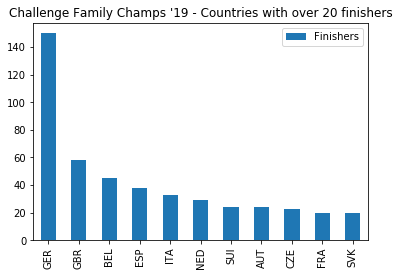

In [57]:
# plot countries with over 20 finishers
overtwenty.plot.bar(title='Challenge Family Champs \'19 - Countries with over 20 finishers')

In [58]:
cf19.to_excel("cf19_output.xlsx")  